IMPORTING LIBRARIES

In [117]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import os
import plotly.express as px
import chart_studio as py

IMPORTING DATASET

In [118]:
for dirname, _ , filenames in os.walk('C:/Users/nomul/Downloads/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/nomul/Downloads/kaggle\cleaned_data.csv
C:/Users/nomul/Downloads/kaggle\data.csv
C:/Users/nomul/Downloads/kaggle\dataActual.csv


READING DATA

In [119]:
data = pd.read_csv("C:/Users/nomul/Downloads/kaggle/dataActual.csv" , encoding= 'unicode_escape')

In [120]:
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


DATA PREPROCESSING

In [123]:
#renaming the columns to understand the units
data.rename(columns = {"Accel": "Accel_sec", "TopSpeed" : "Topspeed_KmH", "Range" : "range_Km", "Efficiency" :"efficiency_WhKm", "FastCharge" : "fastCharge_KmH"}, inplace = True)

In [124]:
# replacing the '-' values with 'nan'
data.replace('-', np.nan, inplace = True)

In [125]:
#the column name already contains the unit of the attribute measured, so to remove the unit in the column and convert the split column into int and float..
new = data["Accel_sec"].str.split(" ", n = 1, expand = True)
data["Accel_Sec"]= new[0]
data["Accel_Sec"] = pd.to_numeric(data["Accel_Sec"])
print(data.dtypes['Accel_Sec'])

new1 = data["Topspeed_KmH"].str.split(" ", n = 1, expand = True)
data["TopSpeed_KmH"]= new1[0]
data["TopSpeed_KmH"] = pd.to_numeric(data["TopSpeed_KmH"])
print(data.dtypes['TopSpeed_KmH'])

new2 = data["range_Km"].str.split(" ", n = 1, expand = True)
data["Range_Km"]= new2[0]
data["Range_Km"] = pd.to_numeric(data["Range_Km"])
print(data.dtypes['Range_Km'])

new3 = data["efficiency_WhKm"].str.split(" ", n = 1, expand = True)
data["Efficiency_WhKm"]= new3[0]
data["Efficiency_WhKm"] = pd.to_numeric(data["Efficiency_WhKm"])
print(data.dtypes['Efficiency_WhKm'])

new4 = data["fastCharge_KmH"].str.split(" ", n = 1, expand = True)
data["FastCharge_KmH"]= new4[0]
data["FastCharge_KmH"] = pd.to_numeric(data["FastCharge_KmH"])
print(data.dtypes['FastCharge_KmH'])

data.head()

float64
int64
int64
int64
float64


,Brand,Model,Accel_sec,Topspeed_KmH,range_Km,efficiency_WhKm,fastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Accel_Sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4.6,233,450,161,940.0
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,10.0,160,270,167,250.0
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,4.7,210,400,181,620.0
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,6.8,180,360,206,560.0
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,9.5,145,170,168,190.0


In [126]:
#it can be observed that the new columns have been added at the end, the older columns need to be dropped and the new columns must be shifted to their parent location..

#to drop columns
data.drop(['Accel_sec', 'Topspeed_KmH', 'range_Km',
       'efficiency_WhKm', 'fastCharge_KmH'], axis = 1, inplace = True)

#pop the columns
first_column = data.pop('Accel_Sec')
second_column = data.pop('TopSpeed_KmH')
third_column = data.pop('Range_Km')
fourth_column = data.pop('Efficiency_WhKm')
fifth_column = data.pop('FastCharge_KmH')
  
# insert column 
data.insert(2, 'Accel_sec', first_column)
data.insert(3, 'TopSpeed_KmH', second_column)
data.insert(4, 'Range_Km', third_column)
data.insert(5, 'Efficiency_WhKm', fourth_column)
data.insert(6, 'FastCharge_KmH', fifth_column)
  
data.head()

,Brand,Model,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [127]:
# checking for null values
data.isnull().sum()

Brand              0
Model              0
Accel_sec          0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [128]:
# replacing 'nan' values with mean
data["FastCharge_KmH"]=data["FastCharge_KmH"].apply(pd.to_numeric)
mean=data["FastCharge_KmH"].mean()
data["FastCharge_KmH"]=data["FastCharge_KmH"].fillna(data["FastCharge_KmH"].mean())

In [129]:
data.isnull().sum()

Brand              0
Model              0
Accel_sec          0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [130]:
# converting object data types to categorical
data["Brand"]=data["Brand"].astype('category')
data["Model"]=data["Model"].astype('category')
data["RapidCharge"]=data["RapidCharge"].astype('category')
data["PowerTrain"]=data["PowerTrain"].astype('category')
data["PlugType"]=data["PlugType"].astype('category')
data["BodyStyle"]=data["BodyStyle"].astype('category')
data["Segment"]=data["Segment"].astype('category')
data["PowerTrain"]=data["PowerTrain"].astype('category')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            103 non-null    category
 1   Model            103 non-null    category
 2   Accel_sec        103 non-null    float64 
 3   TopSpeed_KmH     103 non-null    int64   
 4   Range_Km         103 non-null    int64   
 5   Efficiency_WhKm  103 non-null    int64   
 6   FastCharge_KmH   103 non-null    float64 
 7   RapidCharge      103 non-null    category
 8   PowerTrain       103 non-null    category
 9   PlugType         103 non-null    category
 10  BodyStyle        103 non-null    category
 11  Segment          103 non-null    category
 12  Seats            103 non-null    int64   
 13  PriceEuro        103 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 13.8 KB


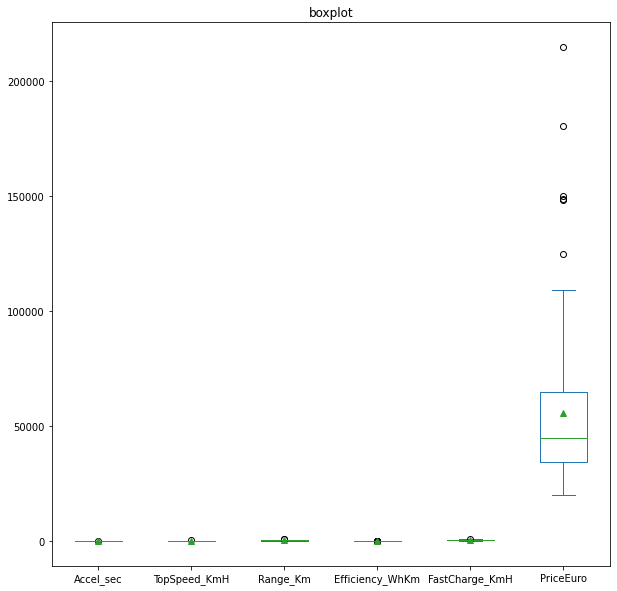

In [132]:
# Check for outliers and treat them if they exist in plenty by visualizing Boxplot technique. The outliers are displayed with dots outside the boxplot
ax = data[['Accel_sec', 'TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro']].plot(kind='box',figsize=(10,10), title='boxplot', showmeans=True)
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



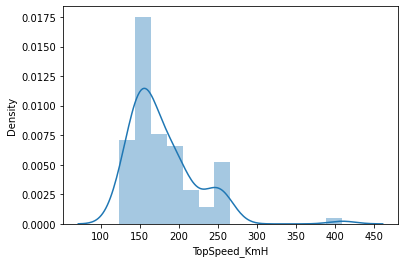

In [133]:
sb.distplot(data['TopSpeed_KmH'])
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



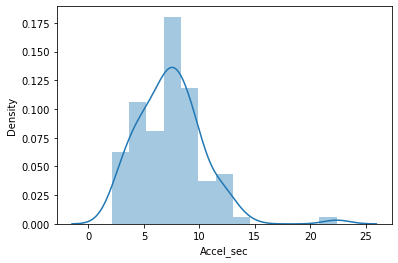

The skewness is 1.2453093178396988


In [134]:
sb.distplot(data['Accel_sec'])
plt.show()
print('The skewness is',data['Accel_sec'].skew())

In [135]:
# Analyse the median to know the basic performance of the data
data.median()

C:\Users\nomul\AppData\Local\Temp\ipykernel_1128\1284046899.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Accel_sec              7.3
TopSpeed_KmH         160.0
Range_Km             340.0
Efficiency_WhKm      180.0
FastCharge_KmH       450.0
Seats                  5.0
PriceEuro          45000.0
dtype: float64

In [136]:
# Descriptive statistics
data.describe()

,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,196.268002,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,305.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,450.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [137]:
# Replace the outliers with median
PriceEuro_median=45000
data['PriceEuro']=data['PriceEuro'].mask(data['PriceEuro']>=120000,PriceEuro_median)

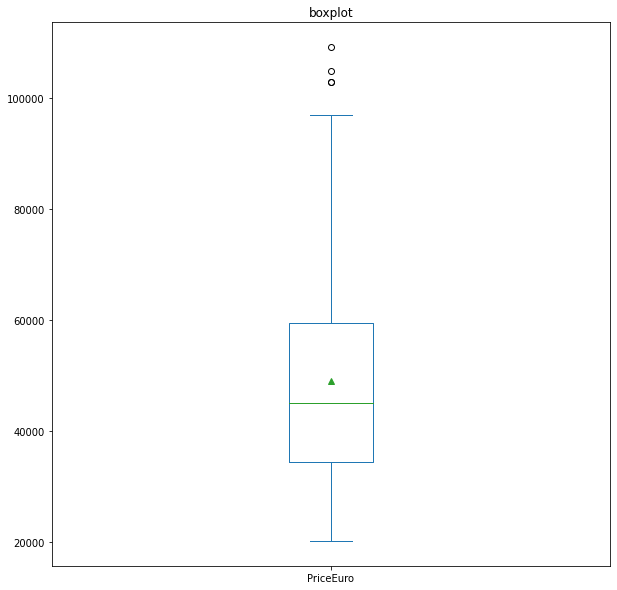

In [138]:
ax = data[['PriceEuro']].plot(kind='box',figsize=(10,10), title='boxplot', showmeans=True)
plt.show()

In [139]:
data.shape

(103, 14)

In [140]:
data['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)
data['PlugType'].replace(to_replace=['Type 2 CCS','Type 2 CHAdeMO','Type 2'],value=['T2CCS', 'T2CHA','T2'],inplace=True)
data['PowerTrain'].replace(to_replace=['All Wheel Drive','Rear Wheel Drive','Front Wheel Drive'],value=['AWD', 'RWD','FWD'],inplace=True)

In [154]:
print(list(data.groupby('Brand')['RapidCharge']))


[('Aiways ', 49    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Audi ', 9     1
23    1
30    1
42    1
50    1
76    1
87    1
90    1
99    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('BMW ', 3     1
13    1
28    1
70    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Byton ', 73     1
97     1
102    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('CUPRA ', 37    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Citroen ', 58    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('DS ', 56    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Fiat ', 85    1
94    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Ford ', 64    1
69    1
78    1
83    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]), ('Honda ', 4     1
55    1
Name: RapidCharge, dtype: category
Categories (2, int64): [0, 1]

EXPLORATORY DATA ANALYSIS (EDA)

In [141]:
a=np.arange(1,1031)

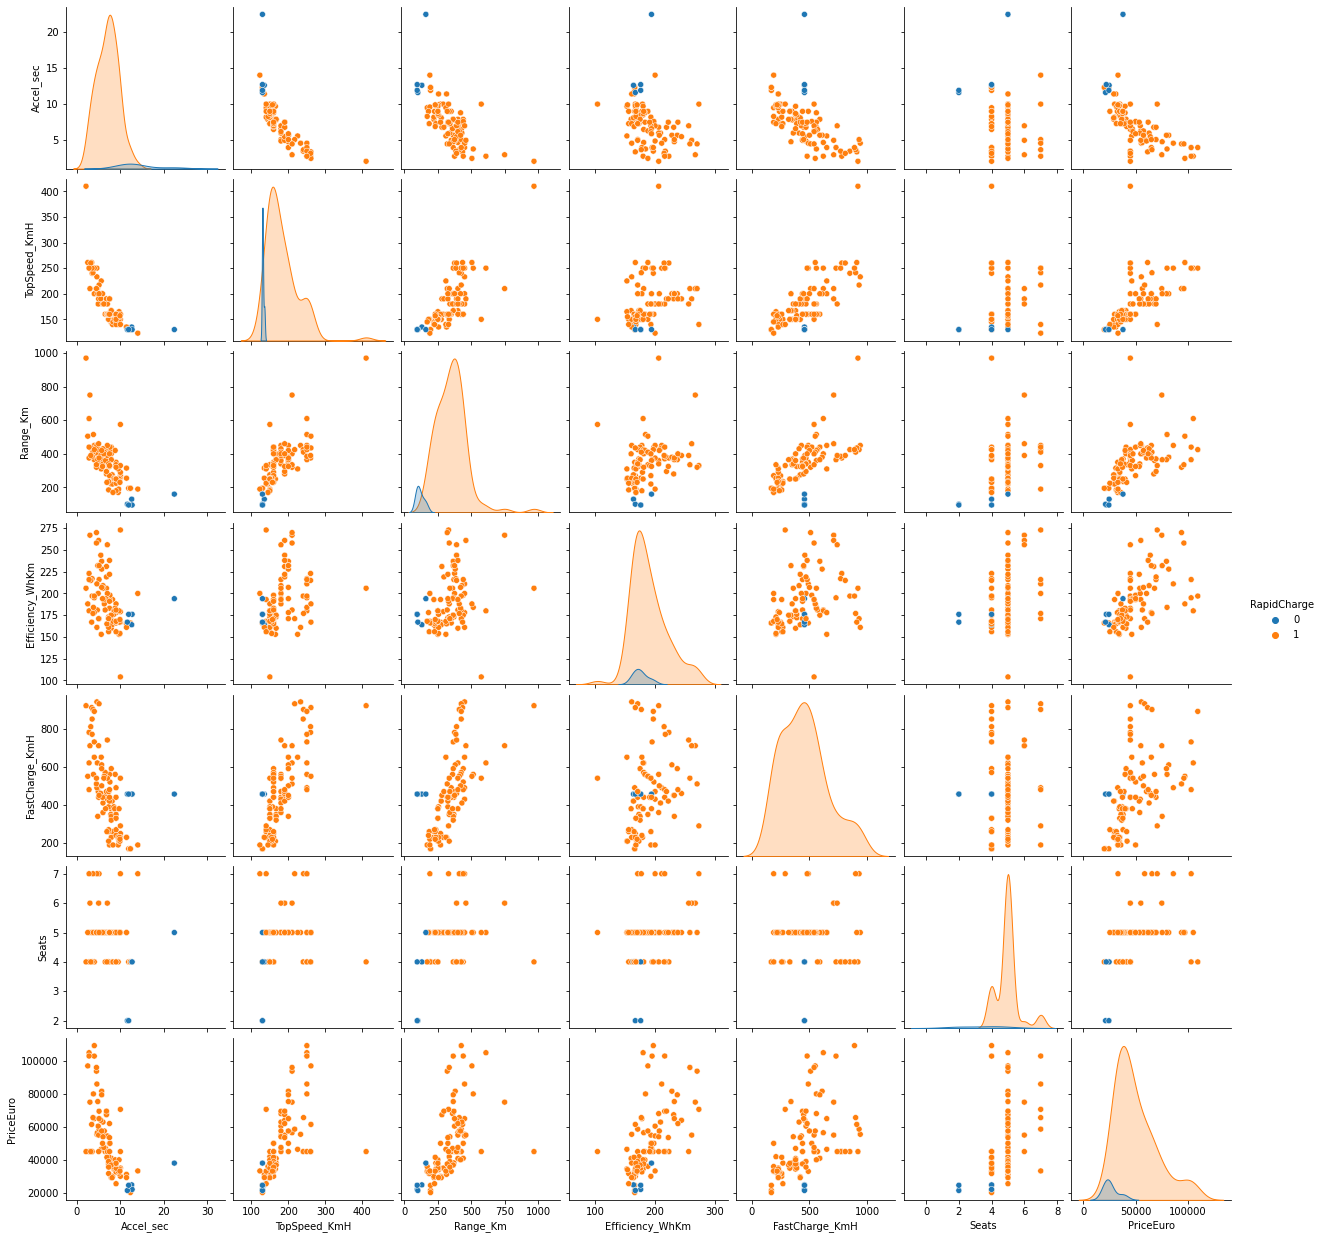

In [142]:
# Pairplot of all the columns based on Rapid Charger presence

sb.pairplot(data,hue='RapidCharge')

In [143]:
# correlation
data.corr()

,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
Accel_sec,1.000000,-0.786195,-0.677062,-0.382904,-0.616833,-0.175335,-0.661935
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.745027,0.126470,0.635391
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.638674,0.300163,0.539272
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.304671,0.301230,0.581979
FastCharge_KmH,-0.616833,0.745027,0.638674,0.304671,1.000000,0.081404,0.496590
Seats,-0.175335,0.126470,0.300163,0.301230,0.081404,1.000000,0.342572
PriceEuro,-0.661935,0.635391,0.539272,0.581979,0.496590,0.342572,1.000000


<AxesSubplot:>

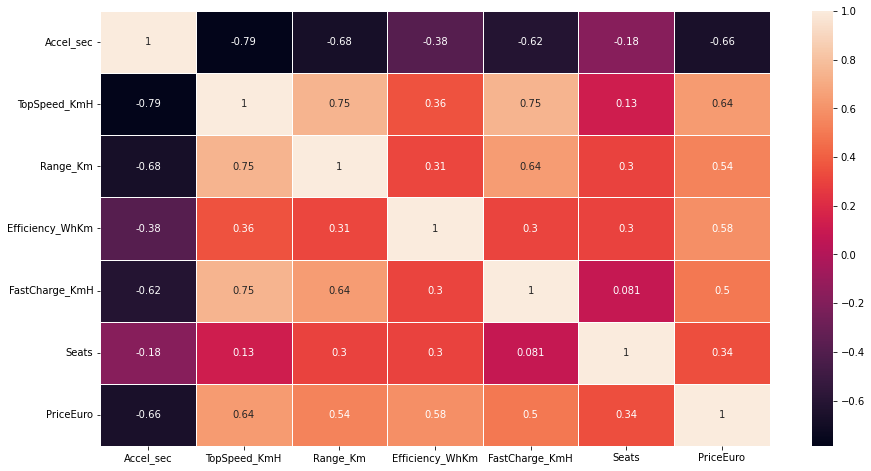

In [144]:
# Heatmap to show the correlation of the data

ax= plt.figure(figsize=(15,8))
sb.heatmap(data.corr(),linewidths=1,linecolor='white',annot=True)

In [145]:
# Frequency of the Brands in the dataset

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=data)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

ValueError: Length of values (1030) does not match length of index (103)

<Figure size 1440x360 with 0 Axes>

Byton , Fiat and smart are the prominent brands and Polestar being the least

In [ ]:
# Top speeds achieved by the cars of a brand

# ax= plt.figure(figsize=(20,5))
# sb.barplot(x='Brand',y='TopSpeed_KmH',data=data,palette='Paired')
# plt.grid(axis='y')
# plt.title('Top Speed achieved by a brand')
# plt.xlabel('Brand')
# plt.ylabel('Top Speed')
# plt.xticks(rotation=45)

px.bar(data,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Byton'),
  Text(4, 0, 'CUPRA'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'DS'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Jaguar'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Lexus'),
  Text(14, 0, 'Lightyear'),
  Text(15, 0, 'Lucid'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Mercedes'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Opel'),
  Text(22, 0, 'Peugeot'),
  Text(23, 0, 'Polestar'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Renault'),
  Text(26, 0, 'SEAT'),
  Text(27, 0, 'Skoda'),
  Text(28, 0, 'Smart'),
  Text(29, 0, 'Sono'),
  Text(30, 0, 'Tesla'),
  Text(31, 0, 'Volkswagen'),
  Text(32, 0, 'Volvo')])

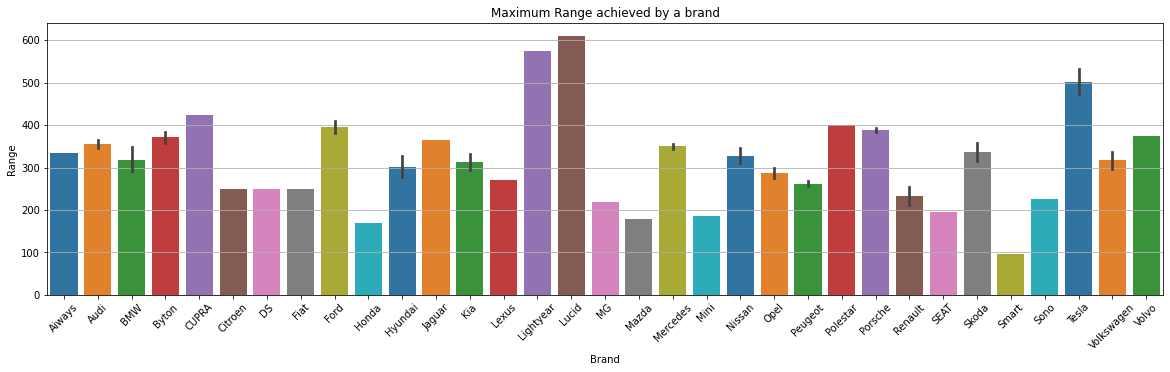

In [ ]:
# Range a car can achieve

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=data,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Byton'),
  Text(4, 0, 'CUPRA'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'DS'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Jaguar'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Lexus'),
  Text(14, 0, 'Lightyear'),
  Text(15, 0, 'Lucid'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Mercedes'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Opel'),
  Text(22, 0, 'Peugeot'),
  Text(23, 0, 'Polestar'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Renault'),
  Text(26, 0, 'SEAT'),
  Text(27, 0, 'Skoda'),
  Text(28, 0, 'Smart'),
  Text(29, 0, 'Sono'),
  Text(30, 0, 'Tesla'),
  Text(31, 0, 'Volkswagen'),
  Text(32, 0, 'Volvo')])

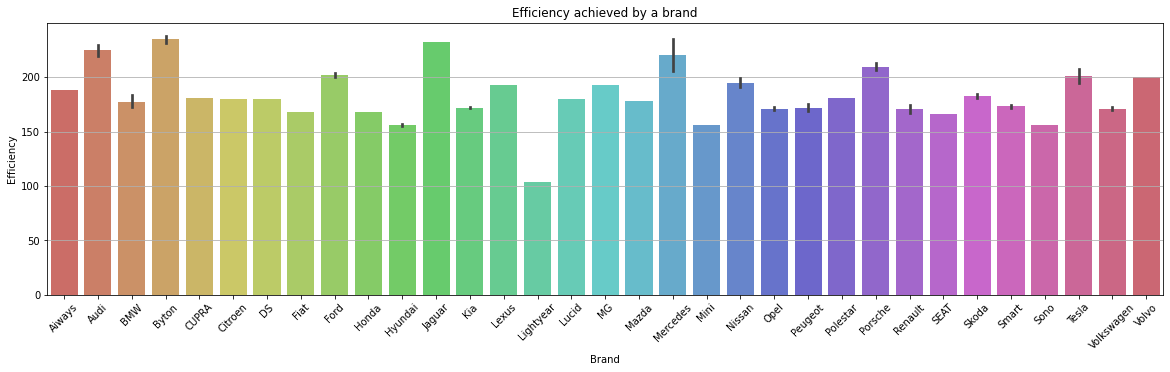

In [ ]:
# Car efficiency

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=data,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton , Jaguar and Audi are the most efficient and Lightyear the least

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Byton'),
  Text(4, 0, 'CUPRA'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'DS'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Jaguar'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Lexus'),
  Text(14, 0, 'Lightyear'),
  Text(15, 0, 'Lucid'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Mercedes'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Opel'),
  Text(22, 0, 'Peugeot'),
  Text(23, 0, 'Polestar'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Renault'),
  Text(26, 0, 'SEAT'),
  Text(27, 0, 'Skoda'),
  Text(28, 0, 'Smart'),
  Text(29, 0, 'Sono'),
  Text(30, 0, 'Tesla'),
  Text(31, 0, 'Volkswagen'),
  Text(32, 0, 'Volvo')])

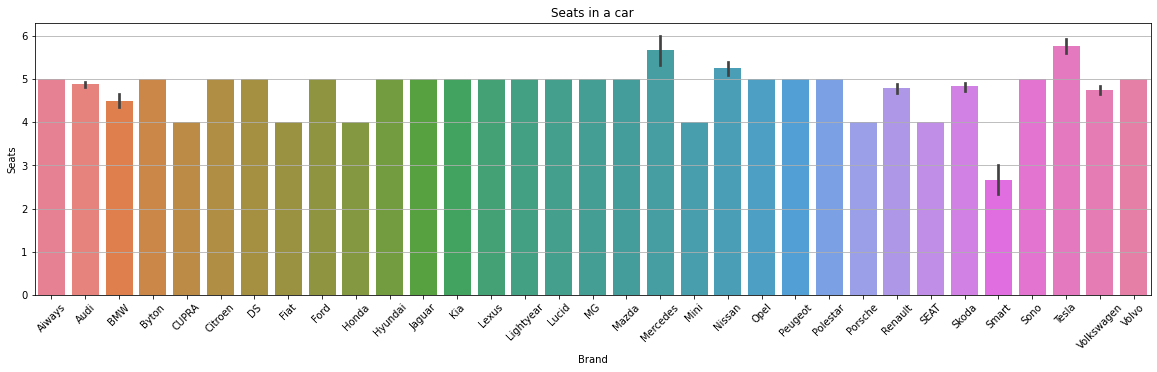

In [ ]:
# Number of seats in each car

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=data,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Byton'),
  Text(4, 0, 'CUPRA'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'DS'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Jaguar'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Lexus'),
  Text(14, 0, 'Lightyear'),
  Text(15, 0, 'Lucid'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Mercedes'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Opel'),
  Text(22, 0, 'Peugeot'),
  Text(23, 0, 'Polestar'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Renault'),
  Text(26, 0, 'SEAT'),
  Text(27, 0, 'Skoda'),
  Text(28, 0, 'Smart'),
  Text(29, 0, 'Sono'),
  Text(30, 0, 'Tesla'),
  Text(31, 0, 'Volkswagen'),
  Text(32, 0, 'Volvo')])

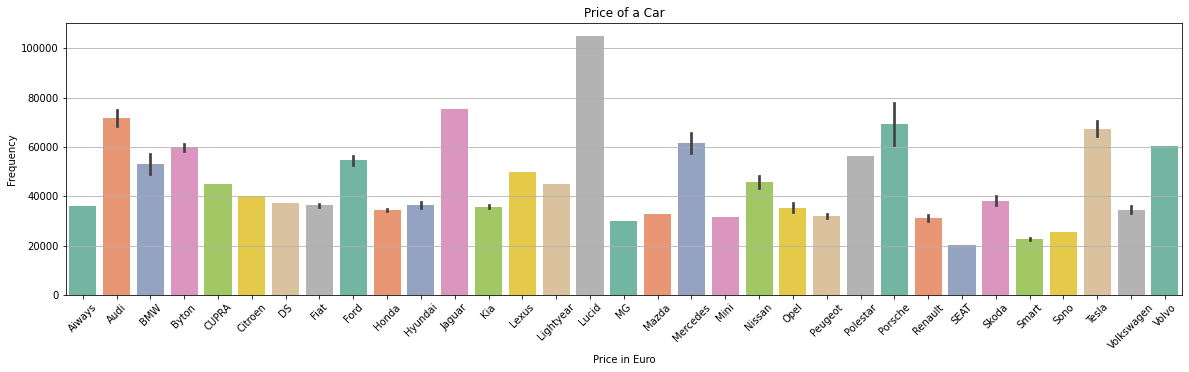

In [ ]:
# Price of cars (in Euro)

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=data,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

Text(0.5, 1.0, 'Plug Type')

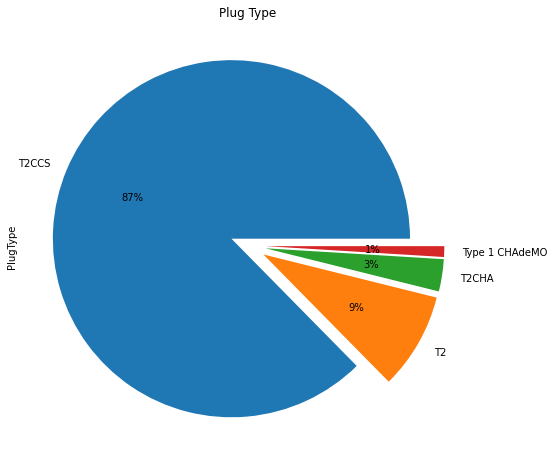

In [ ]:
# Type of Plug used for charging

data['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')


Most companies use Type 2 CCS and Type 1 CHAdeMo the least

Text(0.5, 1.0, 'Body Style')

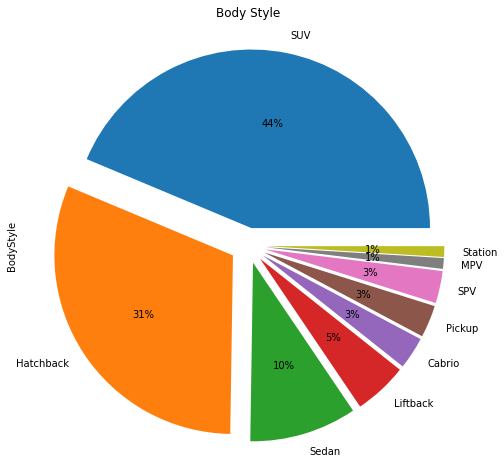

In [ ]:
# Cars and their body style

data['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are eiher SUV or Hatchback

Text(0.5, 1.0, 'Segment')

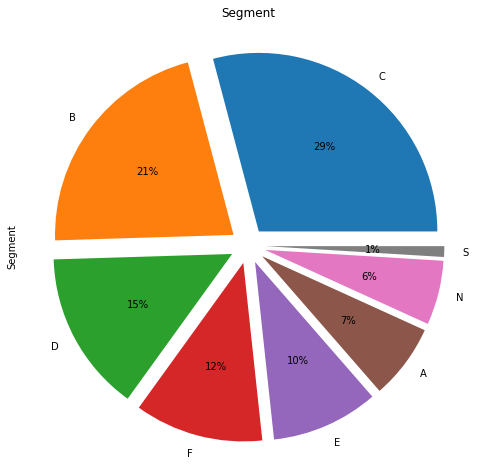

In [ ]:
# Segment in which the cars fall under

data['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

Text(0.5, 1.0, 'Seats')

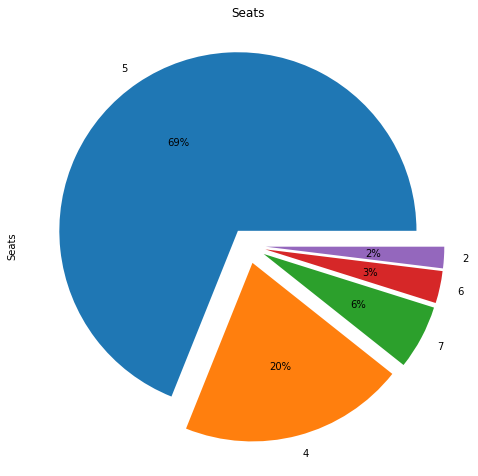

In [ ]:
# Number of Seats (Comparing with other cars)

data['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [ ]:
# Car with fastest acceleration

px.bar(data, x='Accel_sec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})

Volkswagen has the fastest acceleration of 7.3

In [ ]:
px.scatter_3d(data,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')


In [ ]:
px.scatter_3d(data,x = 'Brand',y = 'Accel_sec',z = 'PriceEuro',color = 'Brand')


In [ ]:
px.box(data,x='RapidCharge',y = 'PriceEuro',color = 'RapidCharge',points='all')


In [ ]:
px.scatter(data,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','PriceEuro'])


In [ ]:
px.pie(data,names = 'Brand',values = 'PriceEuro')


In [ ]:
px.bar(data,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')


In [ ]:
fig = px.box(data,x='PriceEuro',y ='Brand' , color='Brand', points='all', hover_data=['Model'] ,
           height=1000, width= 900, orientation='h', title='Price and Brand' , template='ggplot2' ,
            labels=dict(PriceEuro='Price (€)'))
fig.show()

We can see from this graph that Porsche have the most expensive cars in the market with the average price of 148.301k Euro, but the Tesla Roadster is the most expensive with the price 215k Euro and the SEAT Mii Electric is the most affordable with the price 20.129k Euro

In [ ]:
fig = px.scatter(data,x = 'TopSpeed_KmH',y = 'Accel_sec', color = 'Brand', hover_data=['Model'] ,
           opacity=0.8 , title='Acceleration and Top Speed' , height=650 , width=900 , template='ggplot2' ,
                labels=dict(AccelSec='Acceleration (Sec)', TopSpeed_KmH='Top Speed (Km/H)'))

fig.update_traces(marker={'size': 8}) # adjusting the markers size
fig.show()

We can see from here that the Tesla Roadster can go from 0 to 100 Km/H in 2.1 Seconds and its top speed is 410 Km/H, which make it the best car in terms of top speed and acceleration, with most of the cars lying between 140-260 Km/H top speed and 2-10 Seconds acceleration.

In [ ]:
fig = px.scatter(data, x = 'FastCharge_KmH', y = 'Range_Km', color = 'Brand', hover_data=['Model'] ,
           opacity=0.8 , title='Range and Fast Charging' , height=650 , width=900 , template='ggplot2' ,
                labels=dict(Range_Km='Range (Km)', FastCharge_KmH='Fast Charging (Km/H)'))

fig.update_traces(marker={'size': 8}) # adjusting the markers size
fig.show()

We can see here that in general, Tesla and Porscha cars have the best charging rates ranging between 700-970 Km/H, with Tesla topping in the range with some of their cars that can go over 500 Km with a full battery.

In [ ]:
fig = px.histogram(data, x='Range_Km', y='PriceEuro', color='Brand', barmode='group', histfunc='avg', 
                   height=400 , width=1100 , nbins=10 , template='ggplot2' , title='Average Price and Range' ,
                    labels=dict(PriceEuro='Price (€)', Range_Km='Range (Km)'))

fig.show()

This histogram shows the average price of each brand's cars in a certain range. We can see on here that most of the cars ranging 200-500 Km with their price going between 25-150k Euro depending on the brand. Some cars can go between 100-200 Km with a single charge and priced between 20k-35k Euro which make them slightly cheaper than the others

In [ ]:
# data['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)
data['PlugType'].replace(to_replace=['Type 2 CCS','Type 2 CHAdeMO','Type 2'],value=['T2CCS', 'T2CHA','T2'],inplace=True)
data['PowerTrain'].replace(to_replace=['All Wheel Drive','Rear Wheel Drive','Front Wheel Drive'],value=['AWD', 'RWD','FWD'],inplace=True)


Feature Selection

In [ ]:
print(data.shape)

(1030, 14)


In [ ]:
# saving the newly created data to system
data.to_csv("Preprocessed_data.csv")

Label Encoding

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Brand']= label_encoder.fit_transform(data['Brand'])
data['Model']= label_encoder.fit_transform(data['Model'])
data['PowerTrain']= label_encoder.fit_transform(data['PowerTrain'])
data['PlugType']= label_encoder.fit_transform(data['PlugType'])
data['BodyStyle']= label_encoder.fit_transform(data['BodyStyle'])
data['Segment']= label_encoder.fit_transform(data['Segment'])
# data['RapidCharge']=label_encoder.fit_transform(data['RapidCharge'])


data['Brand'].unique()
data['Model'].unique()
data['PowerTrain'].unique()
data['PlugType'].unique()
data['BodyStyle'].unique()
data['Segment'].unique()


array([3, 2, 1, 5, 0, 4, 6, 7])

In [ ]:
# method one for finding relation between categorical and numeric type values
data.corr()

,Brand,Model,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,-0.401572,0.062730,0.101759,0.088316,-0.195901,0.200514,0.056464,-0.209361,-0.275860,-0.002040,0.089589,-0.163539
Model,-0.401572,1.000000,-0.050635,0.067814,-0.066035,0.010976,-0.032009,-0.007609,0.134503,0.261255,0.068414,-0.018943,0.084194
Accel_sec,0.062730,-0.050635,1.000000,-0.786195,-0.677062,-0.382904,-0.616833,0.521011,-0.038049,-0.347164,-0.451568,-0.175335,-0.661935
TopSpeed_KmH,0.101759,0.067814,-0.786195,1.000000,0.746662,0.355675,0.745027,-0.560538,-0.138279,0.339230,0.670403,0.126470,0.635391
Range_Km,0.088316,-0.066035,-0.677062,0.746662,1.000000,0.313077,0.638674,-0.451495,0.011873,0.227477,0.628597,0.300163,0.539272
Efficiency_WhKm,-0.195901,0.010976,-0.382904,0.355675,0.313077,1.000000,0.304671,-0.394721,0.008127,0.373146,0.623263,0.301230,0.581979
FastCharge_KmH,0.200514,-0.032009,-0.616833,0.745027,0.638674,0.304671,1.000000,-0.401034,-0.170683,0.351598,0.583862,0.081404,0.496590
PowerTrain,0.056464,-0.007609,0.521011,-0.560538,-0.451495,-0.394721,-0.401034,1.000000,-0.019587,-0.349484,-0.497850,-0.278882,-0.577089
PlugType,-0.209361,0.134503,-0.038049,-0.138279,0.011873,0.008127,-0.170683,-0.019587,1.000000,0.101962,0.036401,0.235483,-0.142574
BodyStyle,-0.275860,0.261255,-0.347164,0.339230,0.227477,0.373146,0.351598,-0.349484,0.101962,1.000000,0.415428,0.342489,0.452464


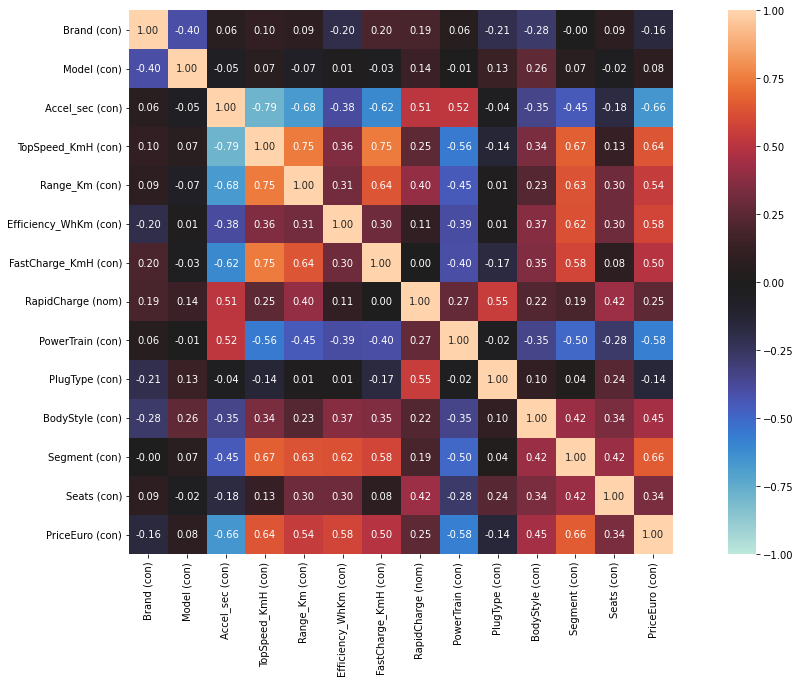

{'corr':                        Brand (con)  Model (con)  Accel_sec (con)  \
 Brand (con)               1.000000    -0.401572         0.062730   
 Model (con)              -0.401572     1.000000        -0.050635   
 Accel_sec (con)           0.062730    -0.050635         1.000000   
 TopSpeed_KmH (con)        0.101759     0.067814        -0.786195   
 Range_Km (con)            0.088316    -0.066035        -0.677062   
 Efficiency_WhKm (con)    -0.195901     0.010976        -0.382904   
 FastCharge_KmH (con)      0.200514    -0.032009        -0.616833   
 RapidCharge (nom)         0.188137     0.144293         0.514820   
 PowerTrain (con)          0.056464    -0.007609         0.521011   
 PlugType (con)           -0.209361     0.134503        -0.038049   
 BodyStyle (con)          -0.275860     0.261255        -0.347164   
 Segment (con)            -0.002040     0.068414        -0.451568   
 Seats (con)               0.089589    -0.018943        -0.175335   
 PriceEuro (con)          

In [ ]:
# method 2 using assosciations
from dython import nominal
nominal.associations(data,figsize=(20,10),mark_columns=True)

In [ ]:
X = data[['Accel_sec', 'TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro',"Brand","Seats","Model","PlugType","PowerTrain","Segment","BodyStyle"]]
# X=data.drop(data['RapidCharge'])
# y = data.iloc[:,7]
y=data[['RapidCharge']]


In [ ]:
data['RapidCharge'].corr(data["Accel_sec"])

-0.5148204915905776

In [ ]:
# method 3 using pointbiserialr
import pandas as pd
from scipy.stats import pointbiserialr
print(pointbiserialr(data['Brand'],data['RapidCharge']))
print(pointbiserialr(data['Model'],data['RapidCharge']))
print(pointbiserialr(data['TopSpeed_KmH'],data['RapidCharge']))
print(pointbiserialr(data['FastCharge_KmH'],data['RapidCharge']))
print(pointbiserialr(data['Seats'],data['RapidCharge']))
print(pointbiserialr(data['PlugType'],data['RapidCharge']))
print(pointbiserialr(data['Segment'],data['RapidCharge']))
print(pointbiserialr(data['PriceEuro'],data['RapidCharge']))
print(pointbiserialr(data['BodyStyle'],data['RapidCharge']))
print(pointbiserialr(data['Efficiency_WhKm'],data['RapidCharge']))
print(pointbiserialr(data['Range_Km'],data['RapidCharge']))
print(pointbiserialr(data['Accel_sec'],data['RapidCharge']))


PointbiserialrResult(correlation=-0.1881369668459262, pvalue=1.1643279972082564e-09)
PointbiserialrResult(correlation=0.14429265604714198, pvalue=3.3257657995821815e-06)
PointbiserialrResult(correlation=0.25105407380264316, pvalue=2.8671955705389293e-16)
PointbiserialrResult(correlation=-7.552145757719342e-18, pvalue=0.9999999999997463)
PointbiserialrResult(correlation=0.4231106142655944, pvalue=5.4164080358803914e-46)
PointbiserialrResult(correlation=0.5535375430127637, pvalue=9.562781554969293e-84)
PointbiserialrResult(correlation=0.18995412612150842, pvalue=7.999252160617759e-10)
PointbiserialrResult(correlation=0.2530428727911525, pvalue=1.6411574157320935e-16)
PointbiserialrResult(correlation=0.22357679592435886, pvalue=3.9068109072324156e-13)
PointbiserialrResult(correlation=0.10567282998610701, pvalue=0.0006817391670025891)
PointbiserialrResult(correlation=0.40129047609662144, pvalue=3.9336760778462605e-41)
PointbiserialrResult(correlation=-0.5148204915905782, pvalue=8.760361552

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X

,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,Brand,Seats,Model,PlugType,PowerTrain,Segment,BodyStyle
0,4.6,233,450,161,940.0,55480,30,5,46,1,0,3,7
1,10.0,160,270,167,250.0,30000,31,5,33,1,2,2,1
2,4.7,210,400,181,620.0,56440,23,5,0,1,0,3,2
3,6.8,180,360,206,560.0,68040,2,5,101,1,2,3,6
4,9.5,145,170,168,190.0,32997,9,4,78,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,7.5,160,330,191,440.0,45000,20,5,6,1,1,2,1
1026,4.5,210,335,258,540.0,96050,1,5,94,1,0,4,6
1027,5.9,200,325,194,440.0,50000,20,5,8,1,0,2,1
1028,5.1,200,375,232,450.0,65000,20,5,10,1,0,2,1


In [ ]:
y

,RapidCharge
0,1
1,1
2,1
3,1
4,1
...,...
1025,1
1026,1
1027,1
1028,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

RANDOM FOREST CLASSIFIER 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for RF: 
[[ 14   0]
 [  0 244]]


C:\Users\nomul\AppData\Local\Temp\ipykernel_1128\742403781.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
val1 = accuracy_score(y_test, predictions)*100
print(val1)

100.0


In [ ]:
print("Classification Report for RF: ")
print(classification_report(y_test, predictions))

Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       244

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 1.0
precision score 1.0
recall score 1.0


DECISION TREE CLASSIFIER    

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for DT: 
[[ 14   0]
 [  0 244]]


In [ ]:
val2 = accuracy_score(y_test, predictions) *100
print(val2)

100.0


In [ ]:
print("Classification Report for DT: ")
print(classification_report(y_test, predictions))

Classification Report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       244

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 1.0
precision score 1.0
recall score 1.0


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for LR: 
[[ 14   0]
 [  0 244]]


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
val3 = accuracy_score(y_test, predictions) * 100
print(val3)

100.0


In [ ]:
print("Classification Report for LR: ")
print(classification_report(y_test, predictions))

Classification Report for LR: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       244

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 1.0
precision score 1.0
recall score 1.0


ACCURACY COMPARISION

In [ ]:
score = [val1,val2,val3]

In [ ]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Logistic Regression')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2]
[100.0, 100.0, 100.0]


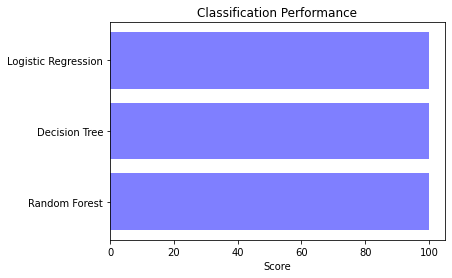

In [ ]:
plt.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()